# 로지스틱회귀분석 목표
- 이진 및 다중 클래스 문제에 대한 분류 문제의 공식 및 수학적 정의
- 클래시파이어의 성능을 평가하는 방법,
- 로지스틱회귀 저변에 깔려 있는 수학
- 로지스틱회귀를 위해 특별히 구축된 SGD 공식 재검토
- 다중 클래스 로지스틱회귀를 사용한 다중 클래스 사례

회귀 문제의 아웃풋에 임계값을 부여하는 것은 실제로 그 값이 고정된 임계값보다 큰지 작은지를 결정하는 이진분류문제이다.

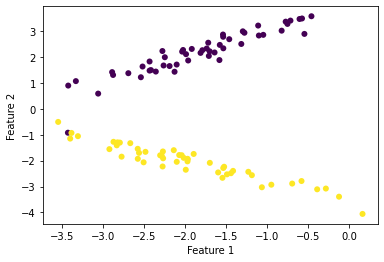

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features = 2,
                         n_informative=2, n_redundant = 0,
                         n_clusters_per_class = 1,
                         class_sep = 2.0, random_state=101)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
           linewidth = 0, edgecolor = None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [2]:
y_orig = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]

In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig, y_pred)

array([[4, 2],
       [1, 3]], dtype=int64)

이 행렬을 통해 몇 가지 증거를 추출할 수 있다.\
- 샘플의 수는 10개이다.(전체 행렬의 합계)
- 원본에서 0으로 분류된 샘플의 수는 6개고, 1로 분류된 수는 4개다(행의 합계). 이 숫자를 서포트(Support)라고 명명한다.
- 예측된 데이터 세트에서 0으로 분류된 샘플의 수는 5개이고, 1로 분류된 수는 5개이다.(열의 합계)
- 올바른 부류는 7개다(대각선의 합)
- 분류 오류는 3개이다.(대각선에 있지 않은 모든 숫자의 합)

모든 숫자는 대각선에 있고, 대각선이 아닌 곳에서 0이 있으면 완벽한 분류의 예제다.

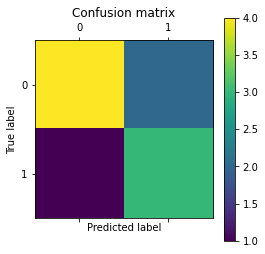

In [4]:
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Classifier 성능을 평가하기 위해 첫 번째 측정 기준은 정확도(accuracy)이다.\
정확도는 총 샘플 개수에 대한 정확한 분류의 백분율이다.\
대각선상의 합계를 행렬 요소의 합계로 나눔으로써 오류 측정값을 혼돈 행렬로부터 직접 얻을 수 있다.\
앞의 예제의 정확도는 0.7이다.

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.7

두 번째 측정 기준은 정밀도(precision)이다. 하나의 라벨만 고려하며, 해당 라벨에 대해 정확한 분류의 백분율을 계산한다.\
라벨 "1"을 고려할 때, 정밀도는 혼돈 행렬에서 오른쪽 하단에 있는 숫자를 두 번째 열에 있는 요소의 합으로 나눈 값이다. 즉 3/5 = 0.6이다.\
Scikit-learn에서 이 함수는 검사 대상 클래스만 참으로 표시되는 이진 입력을 요구한다.(이것을 클래스 표시기 class indicator 라고 한다.)\
각 라벨에 대해 정밀도 점수를 추출하려면 각 클래스를 이진 벡터로 만들어야 한다.

In [6]:
from sklearn.metrics import precision_score
precision_score(y_orig, y_pred)

0.6

정밀도와 다른 오류 측정 방법으로 재현율(recall)이 존재한다. 정밀도가 얻은 것의 질(라벨 "1"로 표시된 결과의 품질)에 관한 것이라면, 재현율은 얻을 수 있었던 것의 질(제대로 추출 할 수 있는 "1"의 인스턴스가 얼마나 많이 있었는지에 대한 품질)에 관한 것이다. 또한 이 측정 방법은 클래스 기반이며 클래스 "1"에 대한 재현율 점수를 계산하기 위해 혼돈 행렬에서 오른쪽 하단의 숫자를 두 번째 행의 합계로 나눠야 한다. 즉 3/4 = 0.75이다. 재현율은 0과 1 사이로 제한되며, 최상의 점수는 1이고 원본 데이터셋에서 "1"이 제대로 분류되지 않았음을 의미한다.

In [7]:
from sklearn.metrics import recall_score
recall_score(y_orig, y_pred)

0.75

정밀도와 재현율은 클래시파이어가 클래스에 얼마나 잘 수행했는지를 나타내는 두 가지 지표다. 조화 평균(harmonic average)을 사용해 두 개의 점수를 합하면 포괄적인 f1-점수를 얻을 수 있으므로 두 오류 측정의 성능을 한눈에 파악할 수 있다.

In [8]:
from sklearn.metrics import f1_score
f1_score(y_orig, y_pred)

0.6666666666666665

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



## 확률 기반 접근법 정의
이진 분류 문제에서, 아웃풋은 0 똔는 1이 될 수 있다. 클래스 "1"에 속하는 라벨의 확률을 확인하면 어떨까?\
구체적으로 특성 벡터가 주어지면 조건부 확률을 최대화하는 클래스를 찾는다.
P(y="1"|x) \

확률론적 해석을 사용해 더미 분류 문제에 다중 선형 리그레서를 적용해보려한다.\
데이터셋을 훈련 집합과 테스트집합을 분리하고 y벡터를 부동 소수점 값으로 변환한다.

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, \
y_test= train_test_split(X,y.astype(float),\
                         test_size = 0.33, random_state=101)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [12]:
y_test.dtype

NameError: name 'y_test' is not defined